In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Jan  5 19:36:18 2019

@author: Meesum
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import time
import numpy as np
os.getcwd()


'C:\\Users\\jaffa'

C:\Users\jaffa\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\jaffa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


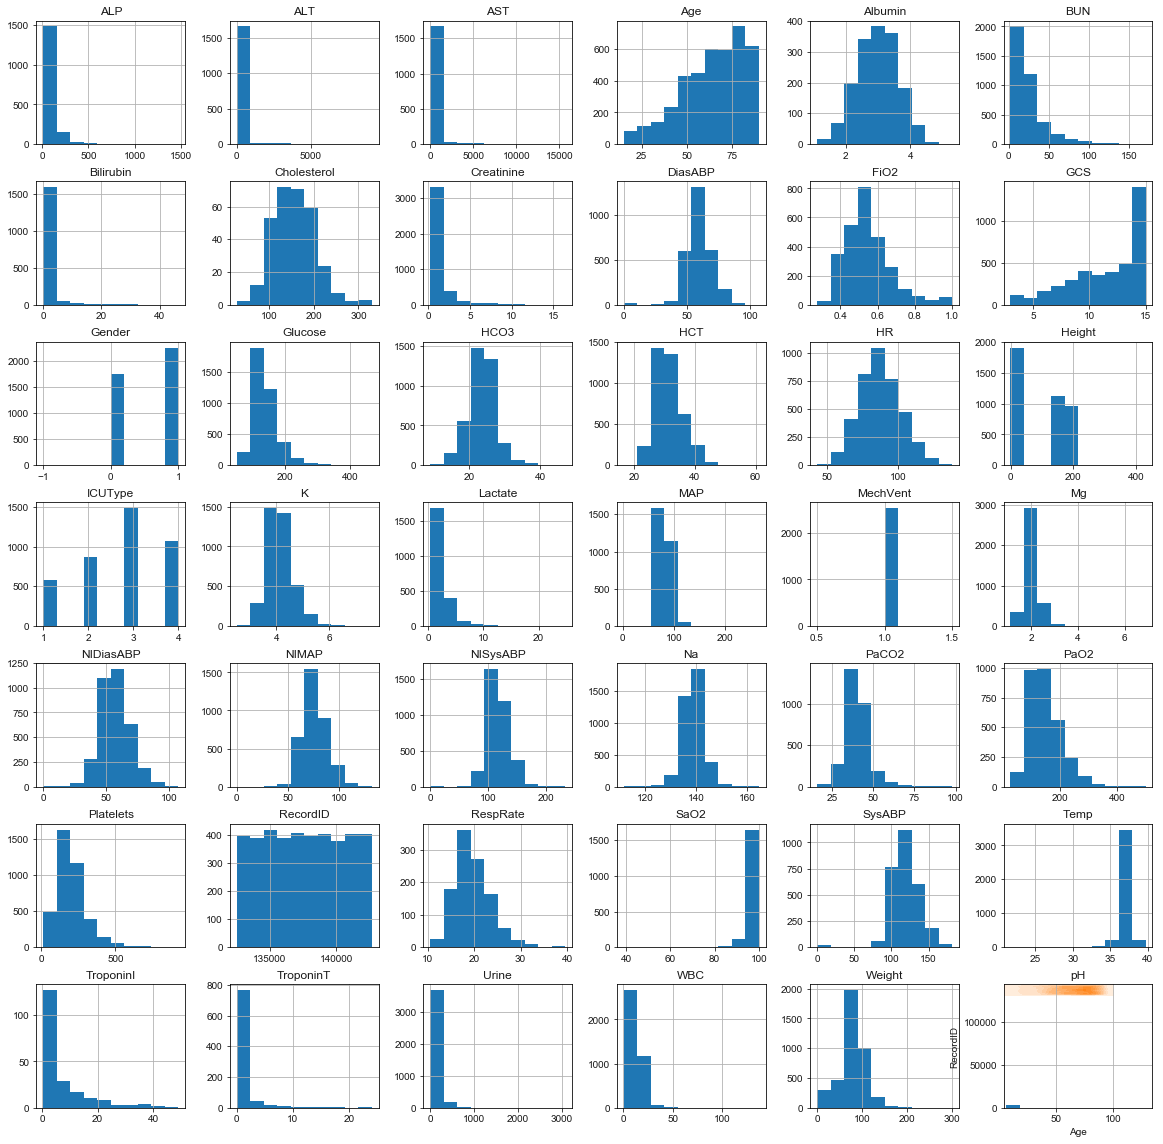

In [2]:
# lsOfFileNames => will contain all file names and lsDataFramesForHist => will contain all data frames
lsOfFileNames = []
lsDataFramesForHist = []
lsDataFramesForTimeSeries = {}
    
#Iterate over folder and append filenames in list declared above. Actual filenames start from 8th index
for files in os.walk("C:\\Users\\jaffa\\OneDrive\\Desktop\\Python project\\Python project\\set-a"):
    for filename in files:
        lsOfFileNames.append(filename)
# print(lsOfFileNames)
lsOfFileNames = lsOfFileNames[2]

# Iterate over each filename and read the data frame. 
# drop Time col as it is not needed in plotting histograms.
# Group the dataframe WRT Parameter and aggregate Value col.
# Append the transpose of grouped dataframe to dataframes list.
for filename in lsOfFileNames:
    d = pd.read_csv("C:\\Users\\jaffa\\OneDrive\\Desktop\\Python project\\Python project\\set-a\\" + filename)
    d.Time = d.Time.map(lambda x: "00:"+x)
    lsDataFramesForTimeSeries[filename] = d
    d = d.drop(columns=['Time'])
    e = d.groupby(['Parameter']).agg({'Value':'mean'})
    lsDataFramesForHist.append(e.T)
    
# Concatenate all dataframes in list into single dataframe
DfForHistogram = pd.concat(lsDataFramesForHist)

# Fill NaN values with zeros (0)
DfForHistogram.fillna(DfForHistogram.mean())

# plot histograms of each col with figsize of your choice
DfForHistogram.hist(figsize=(20,20))

sns.set(color_codes=True)
sns.kdeplot(DfForHistogram.Age,DfForHistogram.RecordID, shade=True);


In [4]:
d = pd.read_csv("C:\\Users\\jaffa\\OneDrive\\Desktop\\Python project\\Python project\\set-a\\" + filename)
d = d.drop(columns=['Time'])
groups = d.groupby(['Parameter'])
e = d.groupby(['Parameter']).agg({'Value':'mean'})

In [5]:
groups.groups.keys()

dict_keys(['ALP', 'ALT', 'AST', 'Age', 'Albumin', 'BUN', 'Bilirubin', 'Creatinine', 'DiasABP', 'FiO2', 'GCS', 'Gender', 'Glucose', 'HCO3', 'HCT', 'HR', 'Height', 'ICUType', 'K', 'Lactate', 'MAP', 'MechVent', 'Mg', 'NIDiasABP', 'NIMAP', 'NISysABP', 'Na', 'PaCO2', 'PaO2', 'Platelets', 'RecordID', 'SaO2', 'SysABP', 'Temp', 'Urine', 'WBC', 'Weight', 'pH'])

In [14]:
groups.get_group('HR')

,Parameter,Value
16,HR,88.0
25,HR,59.0
32,HR,65.0
43,HR,72.0
54,HR,71.0
60,HR,71.0
65,HR,73.0
70,HR,78.0
76,HR,82.0
87,HR,78.0


Enter Patient ID: 132539
['RecordID' 'Age' 'Gender' 'Height' 'ICUType' 'Weight' 'GCS' 'HR'
 'NIDiasABP' 'NIMAP' 'NISysABP' 'RespRate' 'Temp' 'Urine' 'HCT' 'BUN'
 'Creatinine' 'Glucose' 'HCO3' 'Mg' 'Platelets' 'K' 'Na' 'WBC']
Enter Parameter To Plot: RespRate


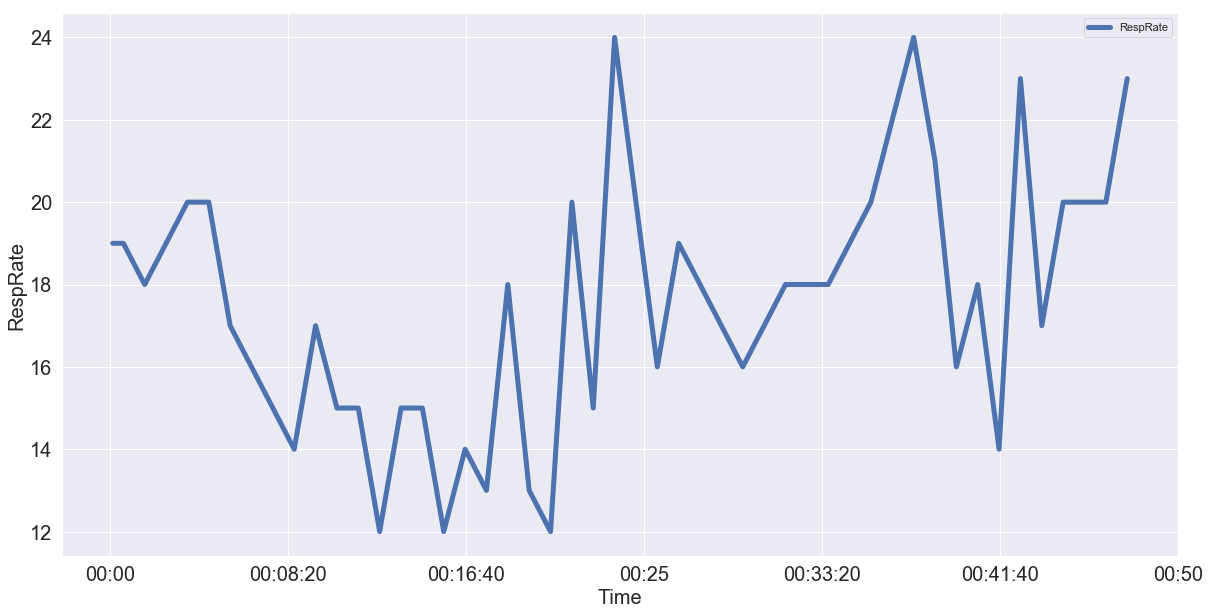

Enter s to stop: s


In [15]:
def plotTimeSeries():
    while True:
        FileName = input("Enter Patient ID: ")
        if (FileName + '.txt') in lsDataFramesForTimeSeries.keys():
            break
#    print("helololool")
#    FileName = '132592'
    tdf = lsDataFramesForTimeSeries[FileName + '.txt']
    params = tdf.Parameter.unique()
    print(params)
    t = True
    while t:
        Param = input("Enter Parameter To Plot: ")
        if Param in params:
            break    
#    
#    import pdb; pdb.set_trace()
#    Param = 'HR'
    tdf.Time = pd.to_datetime(tdf.Time,format= '%H:%M:%S').dt.time
    groups = tdf.groupby('Parameter')
    tdf.describe()
    ts = groups.get_group(Param)
    ts.set_index(ts.Time, inplace=True)
    ts = ts.drop(columns=['Time','Parameter'])
    ts.columns = [Param]
    ts.plot(figsize=(20,10), linewidth=5, fontsize=20)
    plt.xlabel('Time', fontsize=20);plt.ylabel(Param,fontsize=20)
    plt.show()

#x = 0
#for x in range(9):
#    plotTimeSeries()
while True:   
    plotTimeSeries()
    userInput = input("Enter s to stop: ")
    if userInput == 's':
        break
    


In [16]:
def getTimeSeries(FileName,Param):
    
    tdf = lsDataFramesForTimeSeries[FileName + '.txt']
    params = tdf.Parameter.unique()
    print(params)
   
    tdf.Time = pd.to_datetime(tdf.Time,format= '%H:%M:%S').dt.time
    groups = tdf.groupby('Parameter')
    tdf.describe()
    ts = groups.get_group(Param)
    ts.set_index(ts.Time, inplace=True)
    ts = ts.drop(columns=['Time','Parameter'])
    ts.columns = [Param]
    return ts

ts_hr = getTimeSeries('132539','HR')
ts_RespRate = getTimeSeries('132539','RespRate')

['RecordID' 'Age' 'Gender' 'Height' 'ICUType' 'Weight' 'GCS' 'HR'
 'NIDiasABP' 'NIMAP' 'NISysABP' 'RespRate' 'Temp' 'Urine' 'HCT' 'BUN'
 'Creatinine' 'Glucose' 'HCO3' 'Mg' 'Platelets' 'K' 'Na' 'WBC']
['RecordID' 'Age' 'Gender' 'Height' 'ICUType' 'Weight' 'GCS' 'HR'
 'NIDiasABP' 'NIMAP' 'NISysABP' 'RespRate' 'Temp' 'Urine' 'HCT' 'BUN'
 'Creatinine' 'Glucose' 'HCO3' 'Mg' 'Platelets' 'K' 'Na' 'WBC']


In [19]:
dataForPlot = pd.concat([ts_hr,ts_RespRate],axis=1)

C:\Users\jaffa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [23]:
dataForPlot = dataForPlot.fillna(dataForPlot.mean())

In [33]:
dataForPlot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 00:00:07 to 00:47:37
Data columns (total 2 columns):
HR          42 non-null float64
RespRate    42 non-null float64
dtypes: float64(2)
memory usage: 2.2+ KB


C:\Users\jaffa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


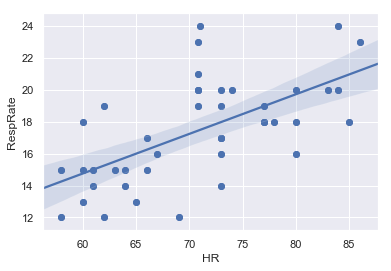

In [26]:
plt.scatter(dataForPlot.HR,dataForPlot.RespRate)
sns.regplot(dataForPlot.HR,dataForPlot.RespRate)

In [53]:
ts = lsDataFramesForTimeSeries['132539.txt']
ts.Time = pd.to_datetime(ts.Time,format= '%H:%M:%S').dt.time
ts = ts.drop(columns=['Time'])
groups = ts.groupby('Parameter')
params = groups.groups.keys()
tser = []
for p in params:
    if p == 'Age' or p == 'RecordID' or p == 'Gender' or p == 'Height' or p == 'ICUType' or p == 'Weight':
        continue
    t = groups.get_group(p)
#     t.set_index(t.Time, inplace=True)
    t = t.drop(columns=['Parameter'])
    t.columns = [p]
    t[p]=t[p].map(lambda x: (x - t[p].min())/(t[p].max()-t[p].min())) 
    tser.append(t)
    
tser = pd.concat(tser) 
tser = tser.fillna(0)


C:\Users\jaffa\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [54]:
tser

,BUN,Creatinine,GCS,Glucose,HCO3,HCT,HR,K,Mg,NIDiasABP,NIMAP,NISysABP,Na,Platelets,RespRate,Temp,Urine,WBC
70,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
193,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
71,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
194,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
34,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
50,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
86,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
108,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
129,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


BUN           0.003745
Creatinine    0.003745
GCS           0.043085
Glucose       0.003745
HCO3          0.003745
HCT           0.007036
HR            0.037865
K             0.003745
Mg            0.003745
NIDiasABP     0.027750
NIMAP         0.025746
NISysABP      0.016751
Na            0.003745
Platelets     0.003745
RespRate      0.038307
Temp          0.030889
Urine         0.009499
WBC           0.003745
dtype: float64

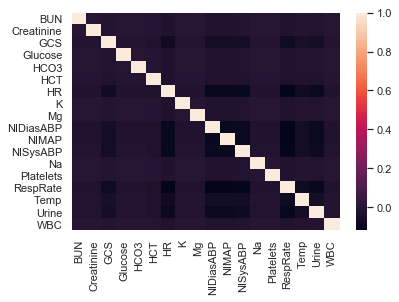

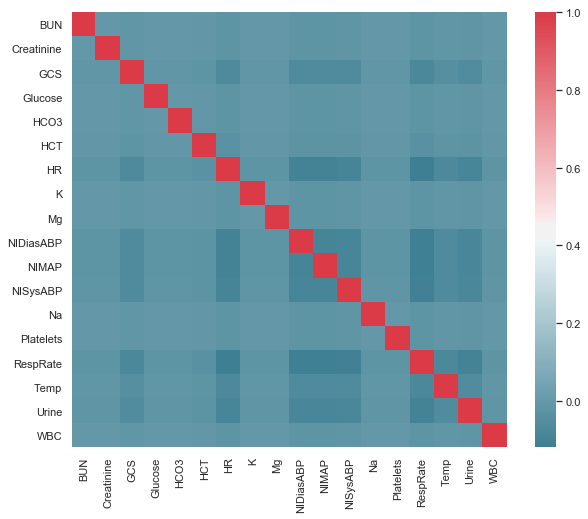

In [55]:

corr = tser.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

tser.var()

In [30]:
tser

,BUN,Creatinine,GCS,Glucose,HCO3,HCT,HR,K,Mg,NIDiasABP,NIMAP,NISysABP,Na,Platelets,RespRate,Temp,Urine,WBC
70,13.0,0.75,14.923077,160.0,27.0,32.5,70.810811,4.2,1.7,50.147059,71.559118,114.382353,136.5,203.0,17.428571,37.357143,171.052632,10.3
193,8.0,0.75,14.923077,160.0,27.0,32.5,70.810811,4.2,1.7,50.147059,71.559118,114.382353,136.5,203.0,17.428571,37.357143,171.052632,10.3
71,10.5,0.80,14.923077,160.0,27.0,32.5,70.810811,4.2,1.7,50.147059,71.559118,114.382353,136.5,203.0,17.428571,37.357143,171.052632,10.3
194,10.5,0.70,14.923077,160.0,27.0,32.5,70.810811,4.2,1.7,50.147059,71.559118,114.382353,136.5,203.0,17.428571,37.357143,171.052632,10.3
6,10.5,0.75,15.000000,160.0,27.0,32.5,70.810811,4.2,1.7,50.147059,71.559118,114.382353,136.5,203.0,17.428571,37.357143,171.052632,10.3
34,10.5,0.75,15.000000,160.0,27.0,32.5,70.810811,4.2,1.7,50.147059,71.559118,114.382353,136.5,203.0,17.428571,37.357143,171.052632,10.3
50,10.5,0.75,15.000000,160.0,27.0,32.5,70.810811,4.2,1.7,50.147059,71.559118,114.382353,136.5,203.0,17.428571,37.357143,171.052632,10.3
86,10.5,0.75,15.000000,160.0,27.0,32.5,70.810811,4.2,1.7,50.147059,71.559118,114.382353,136.5,203.0,17.428571,37.357143,171.052632,10.3
108,10.5,0.75,15.000000,160.0,27.0,32.5,70.810811,4.2,1.7,50.147059,71.559118,114.382353,136.5,203.0,17.428571,37.357143,171.052632,10.3
129,10.5,0.75,15.000000,160.0,27.0,32.5,70.810811,4.2,1.7,50.147059,71.559118,114.382353,136.5,203.0,17.428571,37.357143,171.052632,10.3


In [31]:
corr

,BUN,Creatinine,GCS,Glucose,HCO3,HCT,HR,K,Mg,NIDiasABP,NIMAP,NISysABP,Na,Platelets,RespRate,Temp,Urine,WBC
BUN,1.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Creatinine,0.0,1.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
GCS,0.0,0.0,1.000000e+00,0.0,0.0,-1.265928e-28,-2.452444e-25,1.889912e-24,-6.984390e-25,1.095929e-25,2.114295e-26,-1.886123e-25,0.0,0.0,4.038372e-26,8.808450e-25,-1.210576e-26,4.383759e-25
Glucose,0.0,0.0,0.000000e+00,1.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
HCO3,0.0,0.0,0.000000e+00,0.0,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
HCT,0.0,0.0,-1.265928e-28,0.0,0.0,1.000000e+00,1.159741e-29,-9.923411e-29,3.307804e-29,-5.716178e-30,-1.055176e-30,9.245290e-30,0.0,0.0,-2.043939e-30,-4.438566e-29,5.727472e-31,-2.205202e-29
HR,0.0,0.0,-2.452444e-25,0.0,0.0,1.159741e-29,1.000000e+00,-1.807420e-25,6.672853e-26,-1.047986e-26,-2.018364e-27,1.802152e-26,0.0,0.0,-3.841713e-27,-8.420217e-26,1.151905e-27,-4.190581e-26
K,0.0,0.0,1.889912e-24,0.0,0.0,-9.923411e-29,-1.807420e-25,1.000000e+00,-5.147120e-25,8.076990e-26,1.560021e-26,-1.389481e-25,0.0,0.0,2.978094e-26,6.491438e-25,-8.863252e-27,3.230648e-25
Mg,0.0,0.0,-6.984390e-25,0.0,0.0,3.307804e-29,6.672853e-26,-5.147120e-25,1.000000e+00,-2.987500e-26,-5.750052e-27,5.135673e-26,0.0,0.0,-1.095730e-26,-2.398961e-25,3.285453e-27,-1.193919e-25
NIDiasABP,0.0,0.0,1.095929e-25,0.0,0.0,-5.716178e-30,-1.047986e-26,8.076990e-26,-2.987500e-26,1.000000e+00,9.045131e-28,-8.064659e-27,0.0,0.0,1.723056e-27,3.765610e-26,-5.184414e-28,1.873283e-26


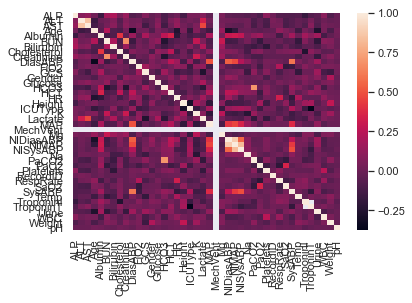

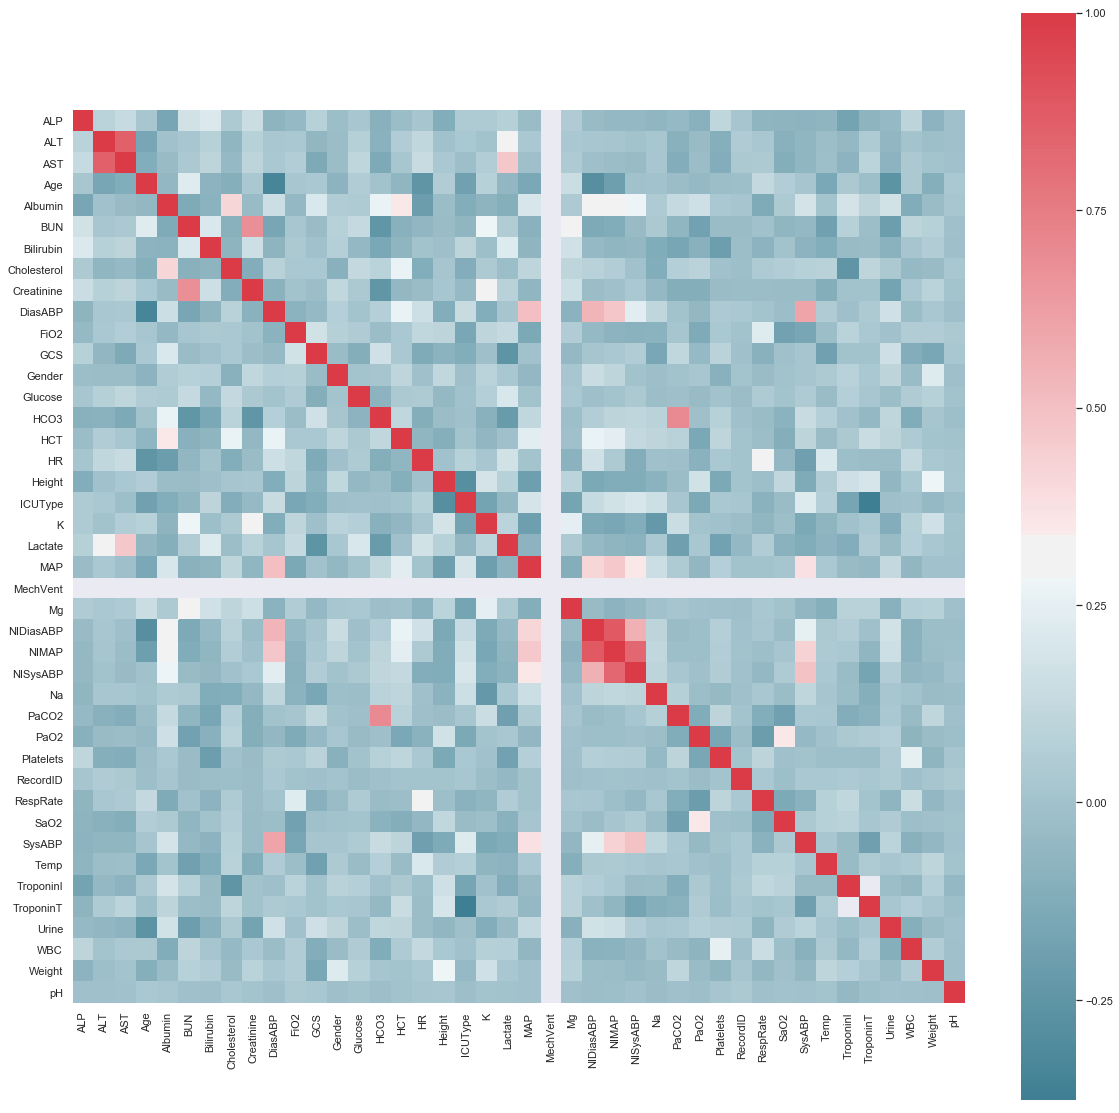

In [38]:
corr = DfForHistogram.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [41]:
corr

,BUN,Creatinine,GCS,Glucose,HCO3,HCT,HR,K,Mg,NIDiasABP,NIMAP,NISysABP,Na,Platelets,RespRate,Temp,Urine,WBC
BUN,1.000000,-0.007324,-0.019112,-0.007064,-0.007335,-0.008997,-0.033611,-0.007332,-0.007290,-0.031832,-0.031980,-0.032008,-0.007340,-0.007312,-0.035806,-0.019870,-0.023495,-0.007312
Creatinine,-0.007324,1.000000,-0.019607,-0.007247,-0.007525,-0.009229,-0.034480,-0.007522,-0.007478,-0.032655,-0.032808,-0.032836,-0.007530,-0.007501,-0.036732,-0.020384,-0.024103,-0.007502
GCS,-0.019112,-0.019607,1.000000,-0.018911,-0.019637,-0.024084,-0.089976,-0.019628,-0.019515,-0.085215,-0.085612,-0.085686,-0.019650,-0.019573,-0.095854,-0.053193,-0.062897,-0.019575
Glucose,-0.007064,-0.007247,-0.018911,1.000000,-0.007258,-0.008902,-0.033257,-0.007255,-0.007213,-0.031497,-0.031644,-0.031671,-0.007263,-0.007235,-0.035430,-0.019661,-0.023248,-0.007236
HCO3,-0.007335,-0.007525,-0.019637,-0.007258,1.000000,-0.009244,-0.034533,-0.007533,-0.007490,-0.032706,-0.032858,-0.032887,-0.007542,-0.007512,-0.036789,-0.020416,-0.024140,-0.007513
HCT,-0.008997,-0.009229,-0.024084,-0.008902,-0.009244,1.000000,-0.042354,-0.009240,-0.009186,-0.040113,-0.040300,-0.040335,-0.009250,-0.009214,-0.045121,-0.025039,-0.029607,-0.009215
HR,-0.033611,-0.034480,-0.089976,-0.033257,-0.034533,-0.042354,1.000000,-0.034518,-0.034319,-0.149857,-0.150556,-0.150685,-0.034557,-0.034421,-0.168567,-0.093544,-0.110609,-0.034425
K,-0.007332,-0.007522,-0.019628,-0.007255,-0.007533,-0.009240,-0.034518,1.000000,-0.007487,-0.032691,-0.032844,-0.032872,-0.007539,-0.007509,-0.036773,-0.020406,-0.024129,-0.007510
Mg,-0.007290,-0.007478,-0.019515,-0.007213,-0.007490,-0.009186,-0.034319,-0.007487,1.000000,-0.032503,-0.032654,-0.032682,-0.007495,-0.007466,-0.036561,-0.020289,-0.023990,-0.007466
NIDiasABP,-0.031832,-0.032655,-0.085215,-0.031497,-0.032706,-0.040113,-0.149857,-0.032691,-0.032503,1.000000,-0.142589,-0.142712,-0.032728,-0.032600,-0.159647,-0.088594,-0.104756,-0.032603


In [42]:
dataForPlot.var()

HR          65.016480
RespRate    10.348432
dtype: float64